In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./inputs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medi-drug-dataset/Medi_Drug.csv


# **Data Cleaning and Preperation**

In [2]:
#Importing Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing File

df = pd.read_csv('./inputs/Medi_Drug.csv')

In [4]:
#Checking the First Few Rows of the Dataframe

df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [5]:
#Checking The Last Few Rows of the Dataframe

df.tail()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2 Reviews,5.0,5.0,5.0,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1 Reviews,5.0,5.0,5.0,\r\n\t\t\t\t\tThis medication is used to treat...
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1 Reviews,5.0,4.0,5.0,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1 Reviews,5.0,5.0,5.0,\r\n\t\t\t\t\tThis medication is used to treat...
2218,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,On Label,OTC,1 Reviews,1.0,4.0,1.0,\r\n\t\t\t\t\tThis medication is used to treat...


In [6]:
#Checking Column Names

df.columns

Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective',
       'EaseOfUse', 'Satisfaction', 'Information'],
      dtype='object')

In [7]:
#Renaming Columns for my ease of use
df = df.rename(columns = {'Condition': 'condition', 'Drug':'drug', 'Indication':'indication', 'Type':'type', 'Effective':'effective', 'Reviews':'review', 'EaseOfUse':'ease_of_use', 'Satisfaction': 'satisfaction', 'Information':'information'})


Since there are lots of info in the information column and can't be categorized, I will drop the information column

In [8]:
#Dropping Information Column
df.drop(columns='information', inplace=True)

In [9]:
#Checking for Missing Values
df.isna().sum()

condition       0
drug            0
indication      0
type            0
review          0
effective       0
ease_of_use     0
satisfaction    0
dtype: int64

In [10]:
#Checking Condition Column

df['condition'].value_counts()

condition
fever                                        308
hypertension                                 236
Atopic Dermatitis                            209
endometriosis                                163
gastroesophageal reflux disease              131
Bacterial Urinary Tract Infection            131
back pain                                    123
gout                                         110
Pharyngitis due to Streptococcus Pyogenes     83
vertigo                                       81
flatulence                                    76
Acute Bacterial Sinusitis                     65
hypercholesterolemia                          59
hemorrhoids                                   53
diverticulitis of gastrointestinal tract      48
Bacterial Conjunctivitis                      42
edema                                         41
prevention of cerebrovascular accident        38
depression                                    32
vulvovaginal candidiasis                      29
fibromyalg

In [11]:
#Capitalizing First Letter of Each Word

df['condition'] = df['condition'].str.title()

df['condition'].value_counts()

condition
Fever                                        308
Hypertension                                 236
Atopic Dermatitis                            209
Endometriosis                                163
Gastroesophageal Reflux Disease              131
Bacterial Urinary Tract Infection            131
Back Pain                                    123
Gout                                         110
Pharyngitis Due To Streptococcus Pyogenes     83
Vertigo                                       81
Flatulence                                    76
Acute Bacterial Sinusitis                     65
Hypercholesterolemia                          59
Hemorrhoids                                   53
Diverticulitis Of Gastrointestinal Tract      48
Bacterial Conjunctivitis                      42
Edema                                         41
Prevention Of Cerebrovascular Accident        38
Depression                                    32
Vulvovaginal Candidiasis                      29
Fibromyalg

In [12]:
#Checking Drug Column

df['drug'].value_counts()

drug
Acetaminophen                                             114
Ibuprofen                                                  73
Diphenhydramine Hcl                                        58
Aspirin                                                    42
Sulfamethoxazole-Trimethoprim                              40
                                                         ... 
Pramoxine-Zinc Oxide                                        1
Hydrocortisone Acetate, Bismuth Subg-Balsam-Znox-Resor      1
Fluocinolone-Skin Clnsr28                                   1
Starch, Pramoxine-Mineral Oil-Zinc                          1
Zinc Oxide                                                  1
Name: count, Length: 470, dtype: int64

In [13]:
#Checking Indication Column

df['indication'].value_counts()

indication
On Label     1723
Off Label     465
\r\n           31
Name: count, dtype: int64

**Off-label** drug use refers to the practice of prescribing a drug for a different purpose than what the FDA approved. 

**On-label** is a  physician prescribing a drug exactly as approved by FDA is doing so on-label.

Source: 

https://www.igliving.com/magazine/articles/IGL_2016-12_AR_On-Label-vs-Off-Label-Prescribing.pdf

https://www.cancer.gov/about-cancer/treatment/drugs/off-label

for \r\n I will rename it as unidentified.

In [14]:
#Renaming \r\n in the indication column

df['indication'] = df['indication'].str.replace('\r\n', 'Unidentified')

df['indication'].value_counts()

indication
On Label        1723
Off Label        465
Unidentified      31
Name: count, dtype: int64

In [15]:
#Checking type column

df['type'].value_counts()

type
RX        1401
OTC        737
RX/OTC      74
\r\n         7
Name: count, dtype: int64

**Rx Type Drugs** are commonly known as drugs that need medical prescription

**OTC Type Drugs** are commonly known as over the counter medicine where you can purchase without a subscription.

Same as before, for \r\n I will rename it as unidentified.

In [16]:
#Renaming \r\n in the type column

df['type'] = df['type'].str.replace('\r\n', 'Unidentified')

df['type'].value_counts()

type
RX              1401
OTC              737
RX/OTC            74
Unidentified       7
Name: count, dtype: int64

In [17]:
#Checking Reviews Column

df['review'].value_counts()

review
1 Reviews       563
2 Reviews       238
3 Reviews       120
4 Reviews       100
5 Reviews        77
               ... 
3066 Reviews      1
4647 Reviews      1
51 Reviews        1
62 Reviews        1
123 Reviews       1
Name: count, Length: 241, dtype: int64

In [18]:
#Removing the word 'Reviews' from the column review

df['review'] = df['review'].str.replace('Reviews', '')
df['review']

0       994 
1       994 
2       755 
3       584 
4       584 
        ... 
2214      2 
2215      1 
2216      1 
2217      1 
2218      1 
Name: review, Length: 2219, dtype: object

In [19]:
#Changing the review column from object into int

df['review'] = df['review'].astype('float64')

df.dtypes

condition        object
drug             object
indication       object
type             object
review          float64
effective       float64
ease_of_use     float64
satisfaction    float64
dtype: object

<Axes: ylabel='Frequency'>

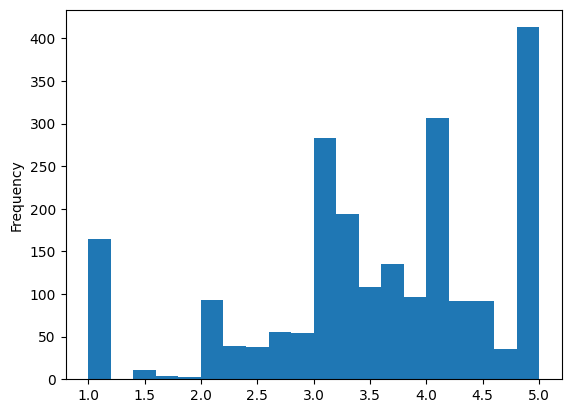

In [20]:
#Checking effective column

df['effective'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

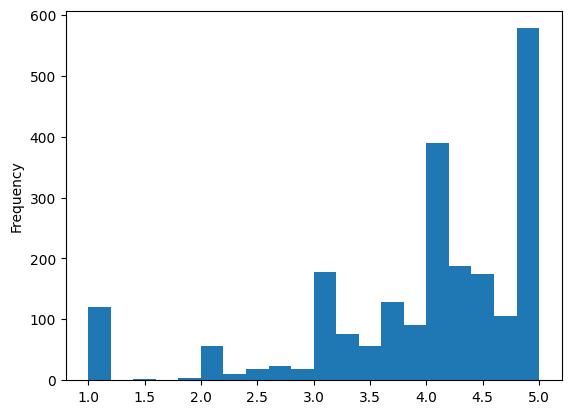

In [21]:
#Checking ease of Use Column

df['ease_of_use'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

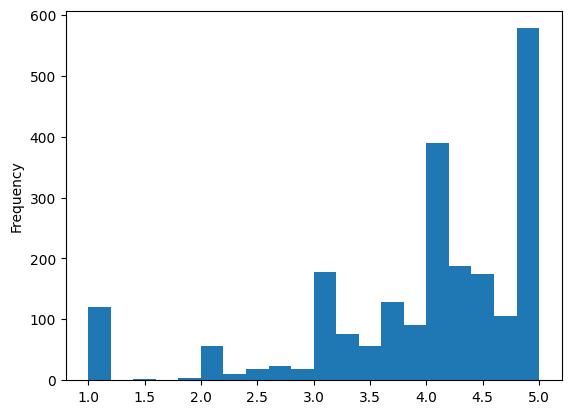

In [22]:
#Checking satisfaction Column

df['ease_of_use'].plot.hist(bins=20)

For better categorization, I will make a new column by defining the ratings of the Effective, Ease of Use and Satisfaction Column.

I will categorize the **effective column by very uneffective, uneffective, partly effective, more than effective, very effective**. I will rename the new column as level of effectiveness.

I will categorize the **ease of use column by very difficult, difficult, normal, easy, very easy**. I will rename the new column as level of difficulty.

I will categorize the **satisfaction column by very unsatisfied, unsatisfied, partly satisfied, more than satisfied, very satisfied**. I will rename the new column as level of satisfaction.

In [23]:
#Categorizing the Column of Effective

effectiveness = []

for score in df['effective']:
    if score < 1.0 : effectiveness.append('Very Uneffective')
    elif score < 2.0 : effectiveness.append('Uneffective')
    elif score < 3.0 : effectiveness.append('Partly Effective')
    elif score < 4.0 : effectiveness.append('More Than Effective')
    elif score <= 5.0 : effectiveness.append('Very Effective')

In [24]:
#Making a New Column
df['level_of_effectiveness'] = effectiveness

In [25]:
#Categorizing the column ease of use

easeofuse = []

for score in df['ease_of_use']:
    if score < 1.0 : easeofuse.append('Very Difficult')
    elif score < 2.0 : easeofuse.append('Difficult')
    elif score < 3.0 : easeofuse.append('Normal')
    elif score < 4.0 : easeofuse.append('Easy')
    elif score <= 5.0 : easeofuse.append('Very Easy')

In [26]:
# Making a new column
df['level_of_difficulty'] = easeofuse

In [27]:
#Categorizing the column satisfaction

satisfaction_level = []

for score in df['satisfaction']:
    if score < 1.0 : satisfaction_level.append('Very Unsatisfied')
    elif score < 2.0 : satisfaction_level.append('Unsatisfied')
    elif score < 3.0 : satisfaction_level.append('Partly Satisfied')
    elif score < 4.0 : satisfaction_level.append('More Than Satisfied')
    elif score <= 5.0 : satisfaction_level.append('Very Satisfied')

In [28]:
#Making a New Column

df['level_of_satisfaction'] = satisfaction_level

In [29]:
#Checking the DataFrame for Duplicates

duplicates = df.duplicated()
df[duplicates]

,condition,drug,indication,type,review,effective,ease_of_use,satisfaction,level_of_effectiveness,level_of_difficulty,level_of_satisfaction
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,Partly Effective,Easy,Unsatisfied
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,More Than Effective,Very Easy,Partly Satisfied
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,More Than Effective,Very Easy,Partly Satisfied
6,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,More Than Effective,Very Easy,Partly Satisfied
7,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,More Than Effective,Very Easy,Partly Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
2187,Vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2188,Vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,4.00,5.00,3.00,Very Effective,Very Easy,More Than Satisfied
2189,Vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,3.00,4.00,4.00,More Than Effective,Very Easy,Very Satisfied
2193,Vulvovaginal Candidiasis,Fluconazole,On Label,RX,225.0,3.32,4.41,2.97,More Than Effective,Very Easy,Partly Satisfied


In [30]:
#Removing the Duplicates

df.drop_duplicates(keep='first', inplace=True)

In [31]:
#Resetting the Index after removing the duplicates

df.reset_index(drop=True)

,condition,drug,indication,type,review,effective,ease_of_use,satisfaction,level_of_effectiveness,level_of_difficulty,level_of_satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,Partly Effective,Easy,Unsatisfied
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08,Partly Effective,Easy,Partly Satisfied
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,More Than Effective,Very Easy,Partly Satisfied
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42,More Than Effective,Easy,Partly Satisfied
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68,Partly Effective,Normal,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
1745,Vulvovaginal Candidiasis,Clotrimazole,On Label,OTC,2.0,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
1746,Vulvovaginal Candidiasis,Butoconazole Nitrate,On Label,RX,1.0,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
1747,Vulvovaginal Candidiasis,Clotrimazole,On Label,OTC,1.0,5.00,4.00,5.00,Very Effective,Very Easy,Very Satisfied
1748,Vulvovaginal Candidiasis,Butoconazole Nitrate,On Label,OTC,1.0,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied


# **DATA EXPLORATION**

## Observation 1

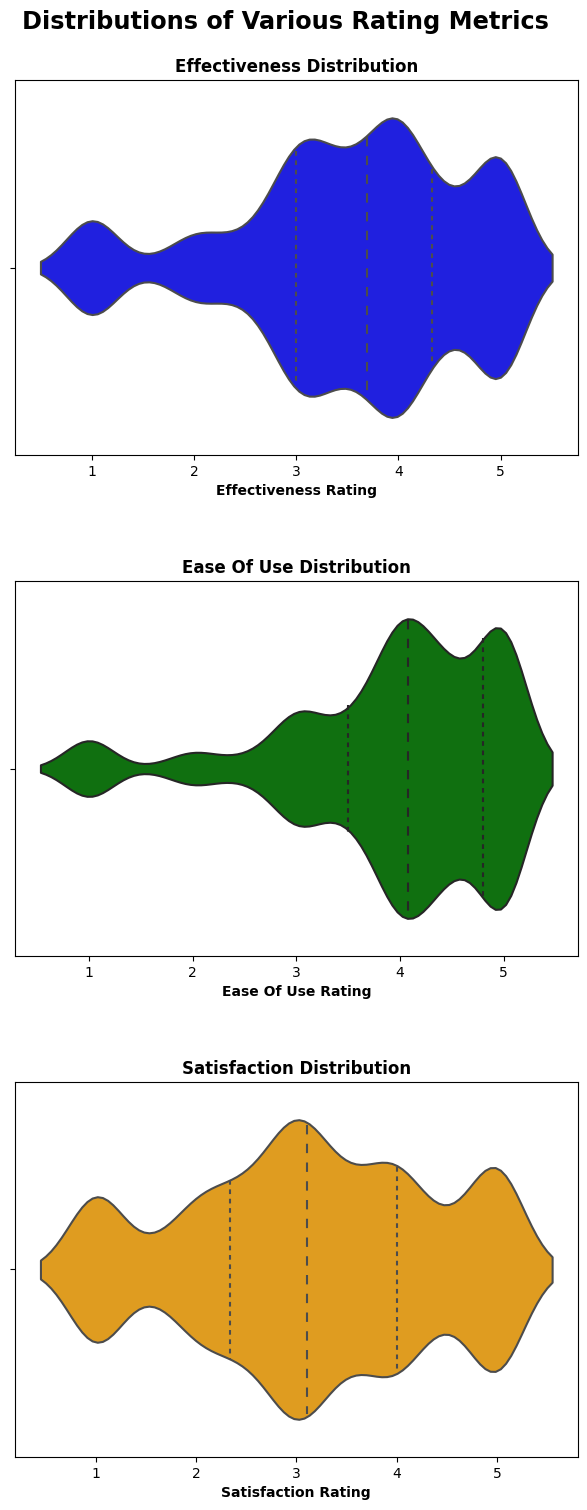

In [32]:
# The distribution of Various Ratings

fig, ax = plt.subplots(3, 1, figsize=(8, 16))

fig.tight_layout(pad=7.0)

fig.suptitle('Distributions of Various Rating Metrics', fontweight='heavy', size='xx-large')

sns.violinplot(ax=ax[0], data=df, x='effective', inner='quartile', scale='count', color='blue')
sns.violinplot(ax=ax[1], data=df, x='ease_of_use', inner='quartile', scale='count', color='green')
sns.violinplot(ax=ax[2], data=df, x='satisfaction', inner='quartile', scale='count', color='orange')

ax[0].set_xlabel('Effectiveness Rating', fontweight='bold')
ax[1].set_xlabel('Ease Of Use Rating', fontweight='bold')
ax[2].set_xlabel('Satisfaction Rating', fontweight='bold')

ax[0].set_title('Effectiveness Distribution', fontweight='bold')
ax[1].set_title('Ease Of Use Distribution', fontweight='bold')
ax[2].set_title('Satisfaction Distribution', fontweight='bold')

plt.show()

From the Effectiveness Distribution, the majority of the effective ratings fall around the ratings of **3 to 4.5**. This means that people find the majoirity of the drugs in regards to treating the specific condition are **more than effective**. 

From the Ease of Use Distribution, the majority of the ease of use ratings fall around the ratings of **3.5 to 4.75**. This means that people find the majority of the drugs in regards to treating the specific condition are **Very Easy to use.**

From the Satisfaction Distribution, the majority of the satisfaction ratings fall around the ratings of **2.25 to 4**. This means that the majority of people find that the drugs in regards to treating the specific condition are **partly staisfying**

The majority of the feature produce a positive correlation. The highest one to note is between the satisfaction feature and the effective feature. Which means that there is a probability that the higher the effectiveness of a drug to treat a certain condition, the higher the person will be satisfied. 

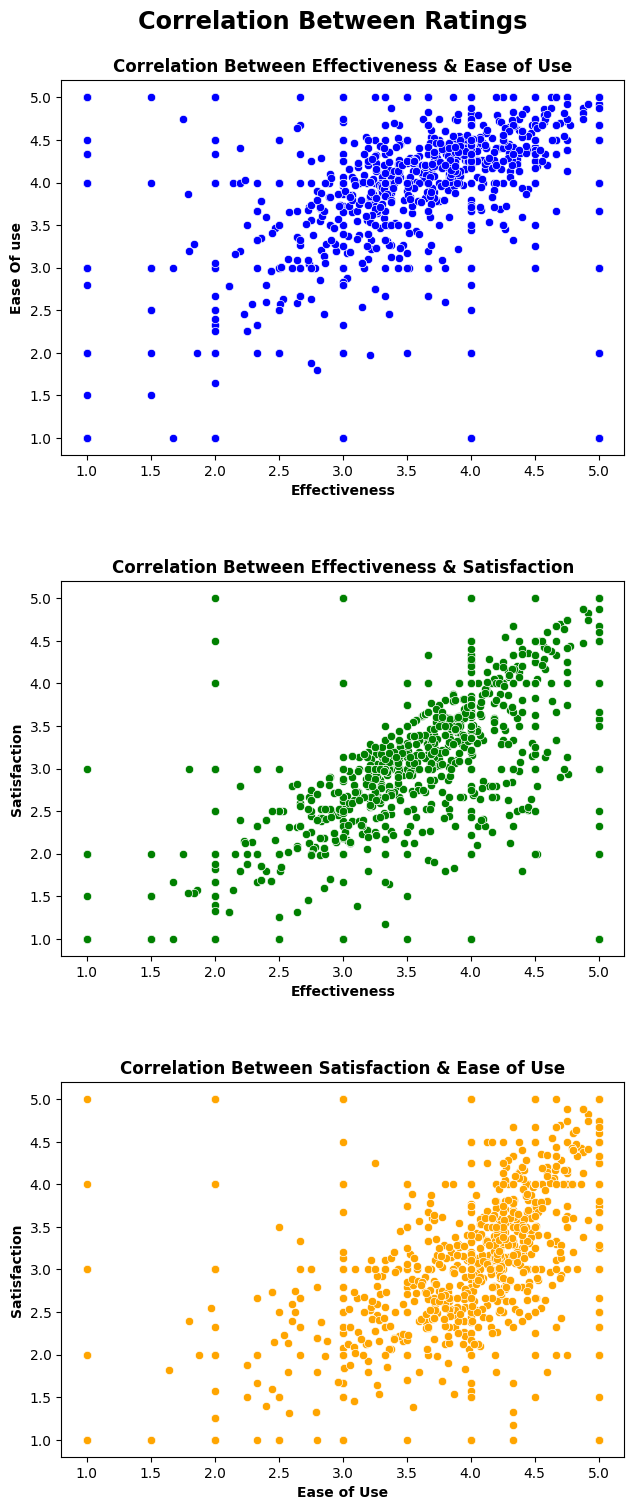

In [33]:
#Correlation Between Ratings

fig, ax = plt.subplots(3, 1, figsize=(8, 16))

fig.tight_layout(pad=7.0)

fig.suptitle('Correlation Between Ratings', fontweight='heavy', size='xx-large')

sns.scatterplot(ax=ax[0],data=df, x='effective', y='ease_of_use', color = 'blue')
sns.scatterplot(ax=ax[1],data=df, x='effective', y='satisfaction', color = 'green')
sns.scatterplot(ax=ax[2],data=df, x='ease_of_use', y='satisfaction', color = 'orange')

ax[0].set_title('Correlation Between Effectiveness & Ease of Use', fontweight='bold')
ax[0].set_ylabel('Ease Of use', fontweight='bold')
ax[0].set_xlabel('Effectiveness', fontweight='bold')

ax[1].set_title('Correlation Between Effectiveness & Satisfaction', fontweight='bold')
ax[1].set_ylabel('Satisfaction', fontweight='bold')
ax[1].set_xlabel('Effectiveness', fontweight='bold')

ax[2].set_title('Correlation Between Satisfaction & Ease of Use', fontweight='bold')
ax[2].set_ylabel('Satisfaction', fontweight='bold')
ax[2].set_xlabel('Ease of Use', fontweight='bold')

plt.show()


## Observation 2

In [34]:
#Finding out what are the top 10 Conditions

top10_val = df['condition'].value_counts().head(10).rename_axis('condition').reset_index(name='counts')

top_10_con = top10_val['condition']

top10_val

,condition,counts
0,Fever,225
1,Hypertension,215
2,Atopic Dermatitis,172
3,Endometriosis,149
4,Bacterial Urinary Tract Infection,104
5,Back Pain,92
6,Gastroesophageal Reflux Disease,92
7,Gout,82
8,Vertigo,60
9,Hypercholesterolemia,56


Above are the list of the top 10 conditions that are frequently mentioned in the dataset. 

In [35]:
#Creating a dataframe with the top 10 Conditions

dfcon = df.loc[df.condition.isin(top_10_con)]

dfcon_drug = dfcon[(dfcon.level_of_effectiveness == 'Very Effective') & (dfcon.type == 'OTC')]

top10con_drug = dfcon_drug.groupby(['condition', 'drug'])['effective'].mean().rename_axis(['condition', 'drug']).reset_index(name='effective')

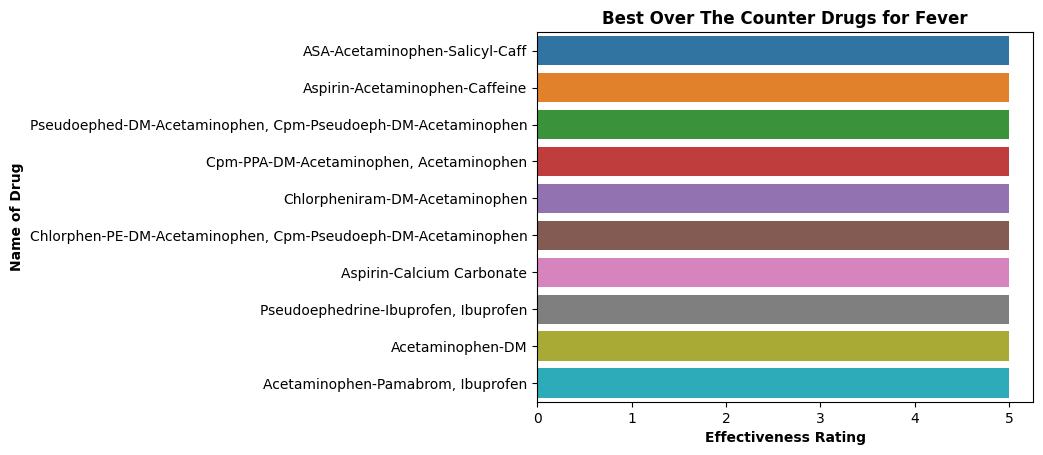

In [36]:
#Displaying best Over The Counter Drugs for Fever

fever = top10con_drug[top10con_drug.condition == 'Fever'].sort_values(by='effective',ascending=False).head(10)

fever_plot = sns.barplot(data=fever, y='drug', x='effective')

fever_plot.set_xlabel('Effectiveness Rating', fontweight='bold')
fever_plot.set_ylabel('Name of Drug', fontweight='bold')
fever_plot.set_title('Best Over The Counter Drugs for Fever', fontweight='heavy')

plt.show()

If we were to have a fever, the drugs above are the most recommended drugs to take based on how the drug is effective against the fever. These drugs are purchaseble over the counter without the need for prescription

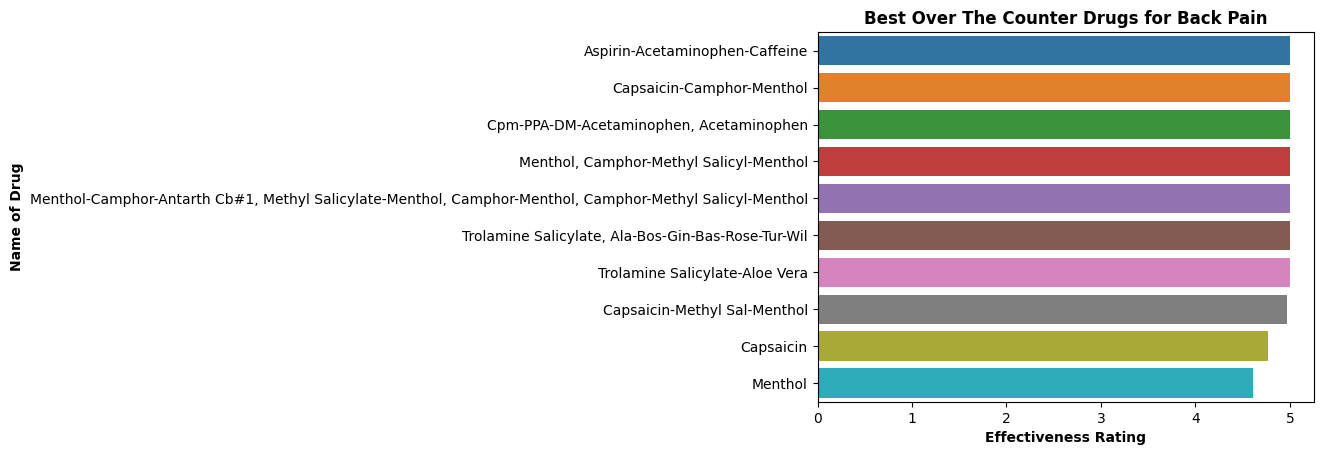

In [37]:
# Best Over The Counter Medicine to Relieve Back Pain

back_pain = top10con_drug[top10con_drug.condition == 'Back Pain'].sort_values(by='effective',ascending=False).head(10)

back_pain_plot = sns.barplot(data=back_pain, y='drug', x='effective')

back_pain_plot.set_xlabel('Effectiveness Rating', fontweight='bold')
back_pain_plot.set_ylabel('Name of Drug', fontweight='bold')
back_pain_plot.set_title('Best Over The Counter Drugs for Back Pain', fontweight='heavy')


plt.show()

If we were to have back pain, the graph above shows the most recommended drugs that can be purchased over the counter, to treat back pain. 

## Observation 3


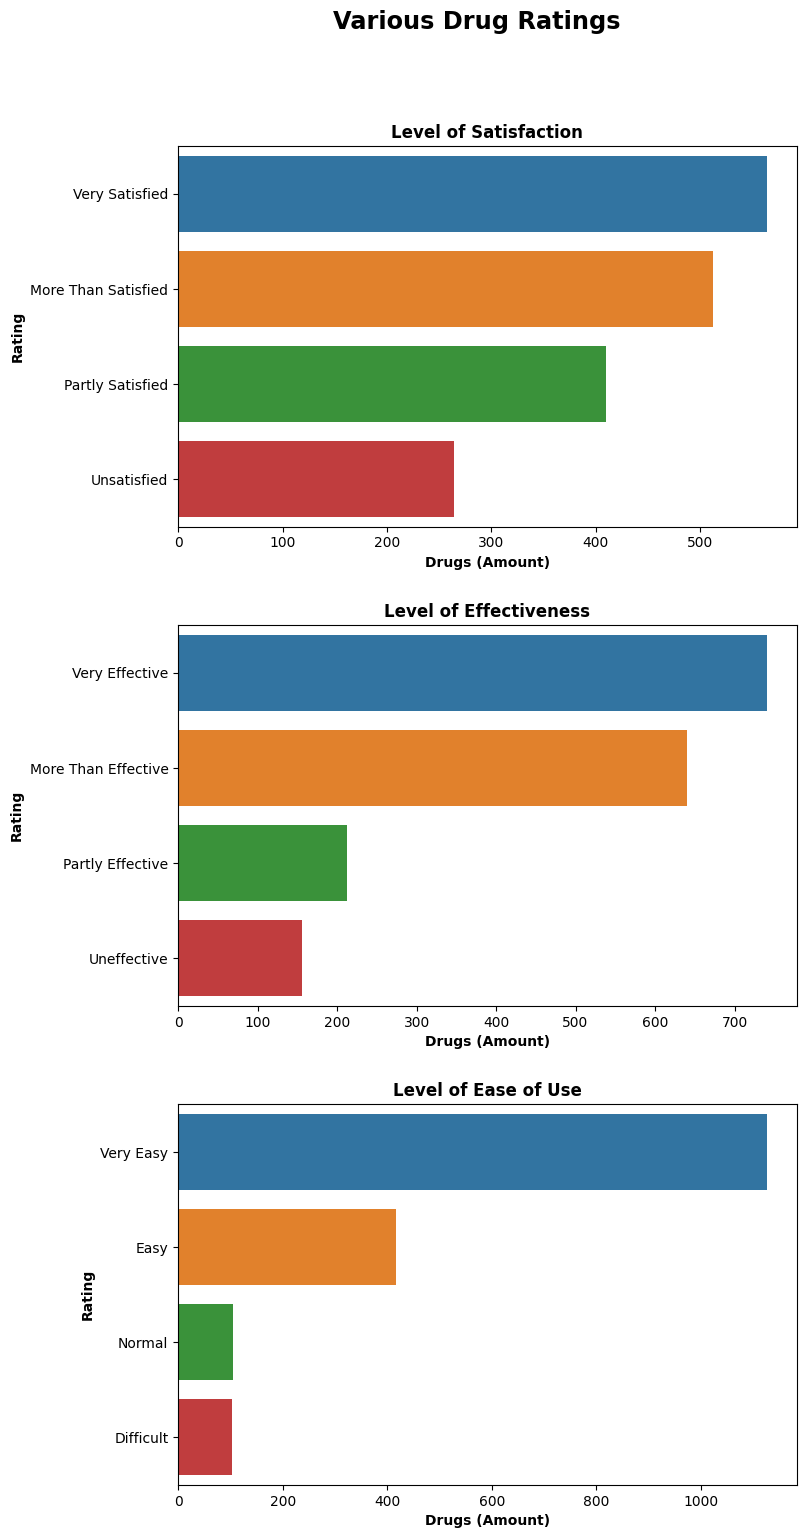

In [38]:
#Displaying Various Drug Ratings

sat = df['level_of_satisfaction'].value_counts().rename_axis('Rating').reset_index(name='Type of Drug (Amount)')

eff = df['level_of_effectiveness'].value_counts().rename_axis('Rating').reset_index(name='Type of Drug (Amount)')

diff = df['level_of_difficulty'].value_counts().rename_axis('Rating').reset_index(name='Type of Drug (Amount)')

fig, ax = plt.subplots(3, 1, figsize=(8, 16))

fig.suptitle('Various Drug Ratings', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=5.0)

sns.barplot(data=sat, ax=ax[0], x='Type of Drug (Amount)', y='Rating')
sns.barplot(data=eff, ax=ax[1], x='Type of Drug (Amount)', y='Rating')
sns.barplot(data=diff, ax=ax[2], x='Type of Drug (Amount)', y='Rating')

ax[0].set_title('Level of Satisfaction', fontweight='bold')
ax[0].set_ylabel('Rating', fontweight='bold')
ax[0].set_xlabel('Drugs (Amount)', fontweight='bold')

ax[1].set_title('Level of Effectiveness', fontweight='bold')
ax[1].set_ylabel('Rating', fontweight='bold')
ax[1].set_xlabel('Drugs (Amount)', fontweight='bold')

ax[2].set_title('Level of Ease of Use', fontweight='bold')
ax[2].set_ylabel('Rating', fontweight='bold')
ax[2].set_xlabel('Drugs (Amount)', fontweight='bold')

plt.show()

## Observation 4

The list below contains the Most Reviewed Drugs to treat a certain condition. **Over 900 people have used and reviewed the drug**. This means that the ratings for effectiveness, ease of use and satisfaction can be considered more trustworthy since a lot of people have reviewed them.

In [39]:
# Most Reviewed Drug to Treat Certain Condition

most_rev = df.sort_values(by='review', ascending=False,).head(10)
most_rev

,condition,drug,indication,type,review,effective,ease_of_use,satisfaction,level_of_effectiveness,level_of_difficulty,level_of_satisfaction
1186,Fibromyalgia,Duloxetine,On Label,RX,4647.0,3.41,4.13,3.08,More Than Effective,Very Easy,More Than Satisfied
1666,Hypertension,Lisinopril,On Label,RX,4268.0,3.40,4.00,2.72,More Than Effective,Very Easy,Partly Satisfied
1187,Fibromyalgia,Pregabalin,On Label,RX,3066.0,3.38,4.07,3.00,More Than Effective,Very Easy,More Than Satisfied
80,Atopic Dermatitis,Prednisone,On Label,RX,2575.0,3.54,3.64,2.74,More Than Effective,Easy,Partly Satisfied
1668,Hypertension,Atenolol,On Label,RX,1268.0,3.74,4.29,3.35,More Than Effective,Very Easy,More Than Satisfied
594,Depression,Amitriptyline,On Label,RX,1126.0,3.53,4.29,3.15,More Than Effective,Very Easy,More Than Satisfied
1188,Fibromyalgia,Amitriptyline,Off Label,RX,1126.0,3.53,4.29,3.15,More Than Effective,Very Easy,More Than Satisfied
1607,Hypercholesterolemia,Simvastatin,On Label,RX,1028.0,3.06,3.83,2.14,More Than Effective,Easy,Partly Satisfied
2028,Prevention Of Cerebrovascular Accident,Simvastatin,On Label,RX,1028.0,3.06,3.83,2.14,More Than Effective,Easy,Partly Satisfied
1608,Hypercholesterolemia,Atorvastatin,On Label,RX,995.0,3.33,3.84,2.45,More Than Effective,Easy,Partly Satisfied


The list below contains the *Least Reviewed Drugs to treat a certain condition*. The list below contain **drugs with ratings that only 1 person has reviewed**. Take consideration when taking these drugs because the effect on a person might differ from you when you decide to take them to treat your condition.

In [40]:
#Least Reviewed Drug to Treat Certain Condition

least_rev = df.sort_values(by='review', ascending=False,).tail(10)

least_rev

,condition,drug,indication,type,review,effective,ease_of_use,satisfaction,level_of_effectiveness,level_of_difficulty,level_of_satisfaction
1142,Fever,Acetaminophen,On Label,OTC,1.0,1.0,3.0,1.0,Uneffective,Easy,Unsatisfied
1156,Fever,Indomethacin,Off Label,RX,1.0,3.0,5.0,4.0,More Than Effective,Very Easy,Very Satisfied
1144,Fever,Aspirin-Calcium Carbonate,On Label,OTC,1.0,5.0,5.0,5.0,Very Effective,Very Easy,Very Satisfied
1146,Fever,Acetaminophen,On Label,OTC,1.0,1.0,5.0,1.0,Uneffective,Very Easy,Unsatisfied
1149,Fever,Phenylephrine-DM-Acetaminophen,On Label,OTC,1.0,5.0,5.0,3.0,Very Effective,Very Easy,More Than Satisfied
1151,Fever,Phenyleph-DM-Acetamin-Guaifen,On Label,OTC,1.0,1.0,1.0,1.0,Uneffective,Difficult,Unsatisfied
1152,Fever,Doxylamine-PE-DM-Acetaminophen,On Label,OTC,1.0,1.0,1.0,1.0,Uneffective,Difficult,Unsatisfied
1153,Fever,"Pseudoeph-DM-GG-Acetaminophen, Cpm-Pseudoeph-D...",On Label,OTC,1.0,4.0,5.0,4.0,Very Effective,Very Easy,Very Satisfied
1154,Fever,"Pseudoeph-DM-GG-Acetaminophen, Chlorphen-PE-DM...",On Label,OTC,1.0,3.0,3.0,4.0,More Than Effective,Easy,Very Satisfied
2218,Vulvovaginal Candidiasis,Miconazole-Skin Clnsr17,On Label,OTC,1.0,1.0,4.0,1.0,Uneffective,Very Easy,Unsatisfied
